<a href="https://colab.research.google.com/github/DuarteMagano/Hello-Quantum-World/blob/main/tutorial_master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
%pip install qiskit==1.3.2 pylatexenc

# States of probability

In [4]:
import numpy as np

# Quantum states

In [55]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [5]:
u = Statevector([1 / np.sqrt(2), 1 / np.sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

In [8]:
u.draw("latex")

<IPython.core.display.Latex object>

In [ ]:
v.draw("text")

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

In [6]:
v.draw("latex")

<IPython.core.display.Latex object>

In [ ]:
u.is_valid()

True

In [9]:
outcome, state = u.measure()
print(f"{outcome = }")
print("Post-measurement state:"); display(state.draw("latex"))

outcome = '1'
Post-measurement state:


<IPython.core.display.Latex object>

In [10]:
u.draw("latex")

<IPython.core.display.Latex object>

In [11]:
state.draw("latex")

<IPython.core.display.Latex object>

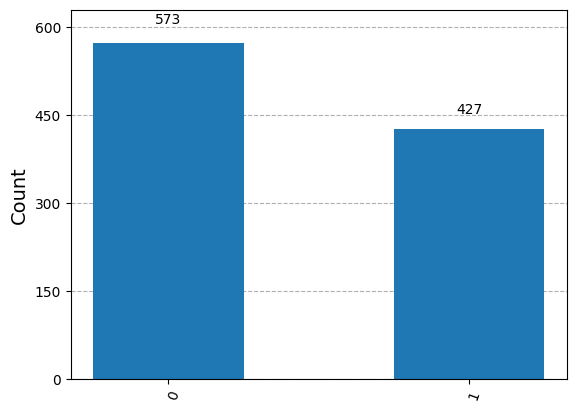

In [12]:
statistics = v.sample_counts(1000)
plot_histogram(statistics)

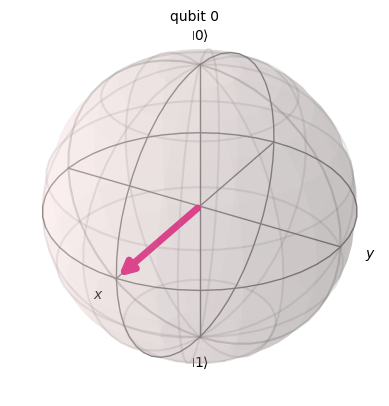

In [56]:
plot_bloch_multivector(u)

# Quantum operations

In [13]:
from qiskit.quantum_info import Operator

In [14]:
U = Operator(np.array([[0., 1.],
                       [1., 0.]]))

In [15]:
U.draw("latex")

<IPython.core.display.Latex object>

In [16]:
U.num_qubits

1

In [17]:
U_unphysical = Operator(np.array([[2., 2.],
                                  [1., 0.]]))

In [18]:
U_unphysical.is_unitary()

False

In [21]:
XX = Operator.from_label("XX")

In [22]:
XX.draw("latex")

<IPython.core.display.Latex object>

In [23]:
XX.num_qubits

2

# Quantum circuits

Build our first quantum circuits.

In [ ]:
from qiskit import QuantumCircuit

In [95]:
qc = QuantumCircuit(1) # circuit with one qubit

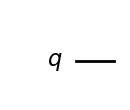

In [97]:
qc.draw('mpl')

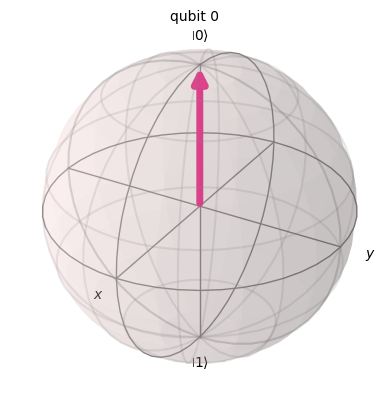

In [98]:
state = Statevector(qc)
plot_bloch_multivector(state)

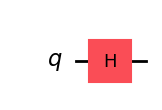

In [99]:
qc.h(0)
qc.draw('mpl')

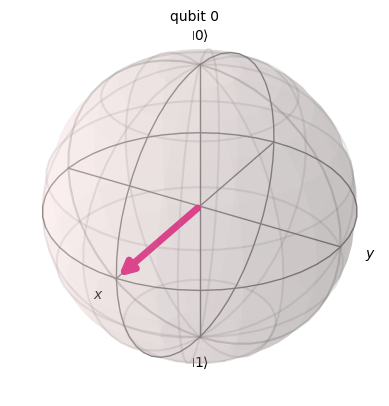

In [100]:
state = Statevector(qc)
plot_bloch_multivector(state)

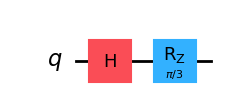

In [101]:
phi = np.pi / 3
qc.rz(phi, 0)
qc.draw('mpl')

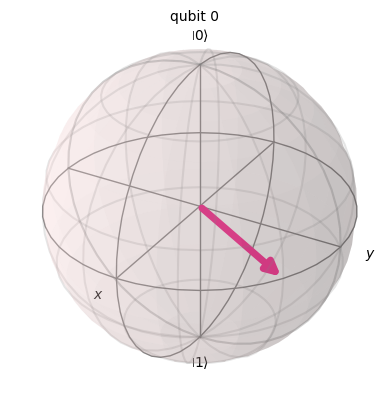

In [102]:
state = Statevector(qc)
plot_bloch_multivector(state)

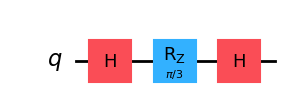

In [103]:
qc.h(0)
qc.draw('mpl')

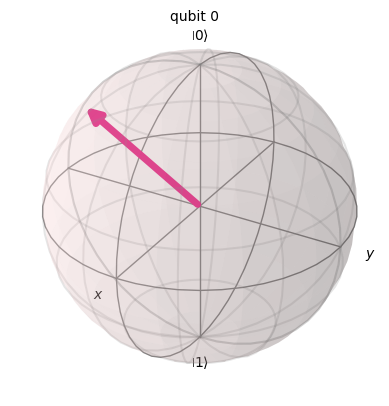

In [104]:
state = Statevector(qc)
plot_bloch_multivector(state)

# Sampler primitive

In [128]:
from qiskit.primitives import StatevectorSampler
from qiskit import QuantumRegister, ClassicalRegister

In [129]:
creg = ClassicalRegister(1, 'c')
qreg = QuantumRegister(1, 'q')

qc = QuantumCircuit(qreg, creg)

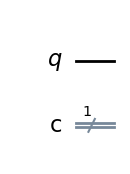

In [130]:
qc.draw('mpl')

In [131]:
phi = np.pi / 3
qc.h(qreg)
qc.rz(phi, qreg)
qc.h(qreg)
qc.measure(qreg, creg)

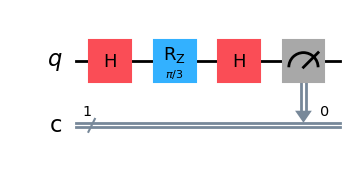

In [132]:
qc.draw('mpl')

In [133]:
state = Statevector(qc) # error -  we need to qc.remove_final_measurements() before using Statevector

QiskitError: 'Cannot apply instruction with classical bits: measure'

In [148]:
sampler = StatevectorSampler()
NSHOTS = 4096

In [152]:
job = sampler.run([qc], shots=NSHOTS)

In [156]:
results = job.result()[0] # the "0" index is because you can run more than one circuit
counts = results.data.c.get_counts() # the "c" attribute is named after the classical register

In [157]:
print(f"{counts = }")

counts = {'0': 3041, '1': 1055}


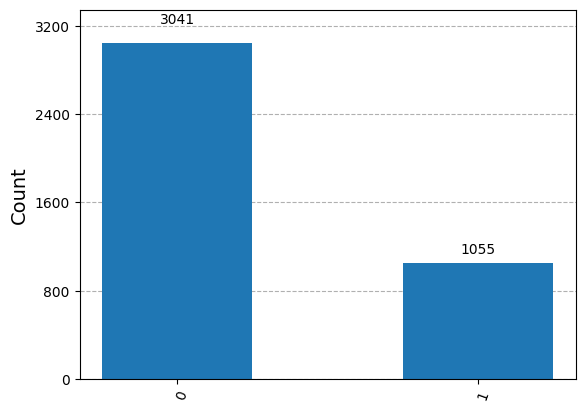

In [158]:
plot_histogram(counts)

# Multiple qubits

# Qiskit runtime

# My first quantum algorithm

# Variational quantum eigensolver